# Problem Set 8 - Liam Seper

In [2]:
import numpy as np
import matplotlib.pyplot as pp
import scipy.integrate as scint
import scipy.stats as stats
import math

REG_ROUND = 4
SPEC_ROUND = 6

ITEMS = [('g', 'green shell'), ('g3', 'green shell (3)'), ('r', 'red shell'), 
         ('r3', 'red shell (3)'), ('b', 'banana'), ('b3', 'banana (3)'),
         ('m', 'mushroom'), ('m3', 'mushroom (3)'), ('km', 'king mushroom'),
         ('f', 'fire flower'), ('s', 'star'), ('bl', 'blooper'),
         ('bo', 'bomb'), ('bs', 'blue shell'), ('l', 'lightning'), ('bu', 'bullet'),
         ('boom', 'boomerang'), ('p', 'piranha plant'), ('h', 'horn'), ('c', 'coin'), 
         ('8', 'crazy 8')]

MAPS = {'mushroom' : [('mks', 'Mario Kart Stadium'), ('wp', 'Water Park'), 
                      ('ssc', 'Sweet Sweet Canyon'), ('tr', 'Thwomp Ruins')],
        'flower' : [('mc', 'Mario Circuit'), ('th', 'Toad Harbor'), 
                    ('tm', 'Twisted Mansion'), ('sgf', 'Shy Guy Falls')],
        'star' : [('sa', 'Sunshine Airport'), ('ds', 'Dolphin Shoals'), 
                  ('e', 'Electrodome'), ('mw', 'Mount Wario')],
        'special' : [('cc', 'Cloudtop Cruise'), ('bdd', 'Bone-Dry Dunes'), 
                     ('bc', 'Bowser\'s Castle'), ('rr', 'Rainbow Road')],
        'shell' : [('mmm(wii)', 'Moo Moo Meadows (Wii)'), ('mc(gb)', 'Mario Circuit (GBA)'),
                   ('ccb(gb)', 'Cheap Cheap Beach (DS)'), ('tt(64)', 'Toad\'s Turnpike (N64)')],
        'banana' : [('ddd(gc)', 'Dry Dry Desert (GCN)'), ('dp3(snes)', 'Donut Plains 3 (SNES)'), 
                    ('rrw(n64)', 'Royal Raceway (N64)'), ('dkj(3ds)', 'DK Jungle (3DS)')],
        'leaf' : [('ws(ds)', 'Wario Stadium (DS)'), ('sl(gc)', 'Sherbert Land (GCN)'), 
                  ('mp(3ds)', 'Music Park (3DS)'), ('yv(64)', 'Yoshi Valley (N64)')],
        'lightning' : [('ttc(ds)', 'Tick-Tock Clock (DS)'), ('pps(3ds)', 'Piranha Plant Slide (3DS)'), 
                       ('gv(wii)', 'Grumble Volcano (Wii)'), ('rr(64)', 'Rainbow Road (N64)')],
        'egg' : [('yc(gc)', 'Toshi Circuit (GCN)'), ('ea', 'Excitebike Arena'), 
                 ('dd', 'Dragon Driftway'), ('mcy', 'Mute City')],
        'triforce' : [('wgm(wii)', 'Wario\'s Gold Mine'), ('rr(snes)', 'Rainbow Road (SNES)'), 
                      ('iio', 'Ice Ice Outpost'), ('hc', 'Hyrule Circuit')],
        'bell' : [('nbc(3ds)', 'Neo Bowser City (3DS)'), ('rr(gb)', 'Ribbon Road (GBA)'), 
                  ('sbs', 'Super Bell Subway'), ('bb', 'Big Blue')],
        'leaf' : [('bp(gc)', 'Baby Park (GCN)'), ('cl(gb)', 'Cheese Land (GBA)'), 
                  ('ww', 'Wild Woods'), ('ac', 'Animal Crossing')]}

In [2]:
def getMeanSamples(dist, size=20, totalSamples=100000):
    return [np.mean(dist.rvs(size)) for i in range(totalSamples)]

In [3]:
def getVarianceSamples(dist, realVar, size=20, totalSamples=100000):
    return [((size - 1) * np.var(dist.rvs(size)) / realVar) for i in range(totalSamples)]

## Question 2

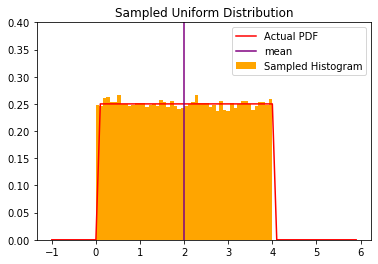

In [22]:
a = 0
b = 4
N = 100000
unifVar = (1/12) * ((b - a) ** 2)

uniform = stats.uniform(loc=a, scale=b)
xVals = np.arange(-1, 6, .1)

pp.hist(uniform.rvs(N), bins=50, density=True, color='orange', label='Sampled Histogram')
pp.plot(xVals, uniform.pdf(xVals), color='red', label='Actual PDF')
pp.axvline(x=b/2, color="purple", label='mean')
pp.title('Sampled Uniform Distribution')
pp.legend(loc='upper right', prop={'size':10})
pp.ylim(0, .4)
pp.show()

In [5]:
ax00UnifMeanVals = getMeanSamples(uniform, size=10)
ax01UnifMeanVals = getMeanSamples(uniform)
ax10UnifMeanVals = getMeanSamples(uniform, size=30)
ax11UnifMeanVals = getMeanSamples(uniform, size=100)

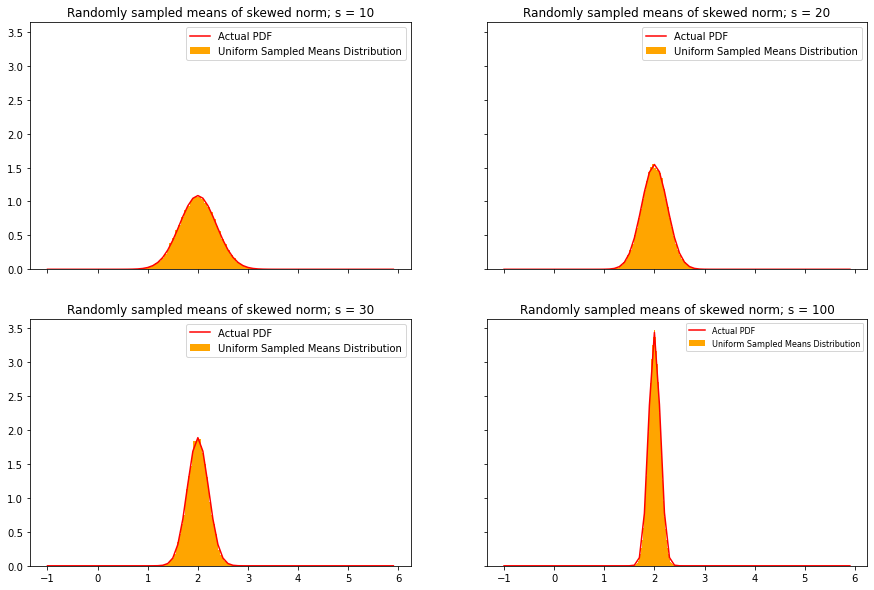

In [24]:
plt, axes = pp.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)

axes[0][0].hist(ax00UnifMeanVals, density=True, bins=50, color='orange', label='Uniform Sampled Means Distribution')
axes[0][0].set_title('Randomly sampled means of skewed norm; s = 10')
axes[0][0].plot(xVals, stats.norm(np.mean(ax00UnifMeanVals), np.std(ax00UnifMeanVals)).pdf(xVals), color='red', label='Actual PDF')
axes[0][0].legend(loc='upper right', prop={'size':10})

axes[0][1].hist(ax01UnifMeanVals, density=True, bins=50, color='orange', label='Uniform Sampled Means Distribution')
axes[0][1].set_title('Randomly sampled means of skewed norm; s = 20')
axes[0][1].plot(xVals, stats.norm(np.mean(ax01UnifMeanVals), np.std(ax01UnifMeanVals)).pdf(xVals), color='red', label='Actual PDF')
axes[0][1].legend(loc='upper right', prop={'size':10})

axes[1][0].hist(ax10UnifMeanVals, density=True, bins=50, color='orange', label='Uniform Sampled Means Distribution')
axes[1][0].set_title('Randomly sampled means of skewed norm; s = 30')
axes[1][0].plot(xVals, stats.norm(np.mean(ax10UnifMeanVals), np.std(ax10UnifMeanVals)).pdf(xVals), color='red', label='Actual PDF')
axes[1][0].legend(loc='upper right', prop={'size':10})

axes[1][1].hist(ax11UnifMeanVals, density=True, bins=50, color='orange', label='Uniform Sampled Means Distribution')
axes[1][1].set_title('Randomly sampled means of skewed norm; s = 100')
axes[1][1].plot(xVals, stats.norm(np.mean(ax11UnifMeanVals), np.std(ax11UnifMeanVals)).pdf(xVals), color='red', label='Actual PDF')
axes[1][1].legend(loc='upper right', prop={'size':8})

plt.show()

Again, in relative to the CLT, the higher the sample size is, the more the distribution approaches a vertical line centered about the actual mean. The distribution is also normal, just as before, which shows how even though they came from two very different sources, their sample means both converge to form a normal distribution.

In [7]:
ax00UnifVarVals = getVarianceSamples(uniform, unifVar, size=10)
ax01UnifVarVals = getVarianceSamples(uniform, unifVar)
ax10UnifVarVals = getVarianceSamples(uniform, unifVar, size=30)
ax11UnifVarVals = getVarianceSamples(uniform, unifVar, size=100)

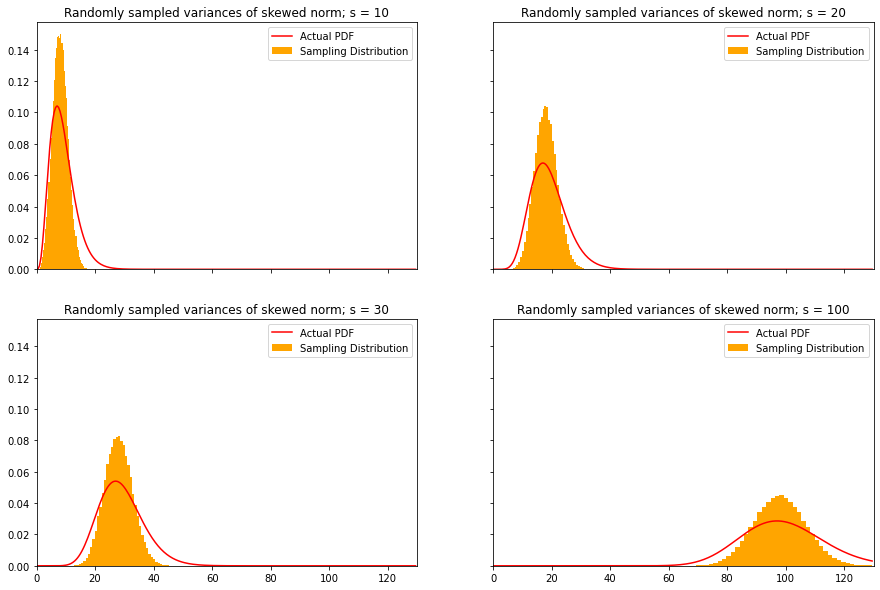

In [25]:
plt, axes = pp.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)

xVals = np.arange(0, 130, 0.5)

axes[0][0].hist(ax00UnifVarVals, density=True, bins=50, color='orange', label='Sampling Distribution')
axes[0][0].set_title('Randomly sampled variances of skewed norm; s = 10')
axes[0][0].plot(xVals, stats.chi2(9).pdf(xVals), color='red', label='Actual PDF')
axes[0][0].set_xlim(0, 130)
axes[0][0].legend(loc='upper right', prop={'size':10})

axes[0][1].hist(ax01UnifVarVals, density=True, bins=50, color='orange', label='Sampling Distribution')
axes[0][1].set_title('Randomly sampled variances of skewed norm; s = 20')
axes[0][1].plot(xVals, stats.chi2(19).pdf(xVals), color='red', label='Actual PDF')
axes[0][1].legend(loc='upper right', prop={'size':10})

axes[1][0].hist(ax10UnifVarVals, density=True, bins=50, color='orange', label='Sampling Distribution')
axes[1][0].set_title('Randomly sampled variances of skewed norm; s = 30')
axes[1][0].plot(xVals, stats.chi2(29).pdf(xVals), color='red', label='Actual PDF')
axes[1][0].legend(loc='upper right', prop={'size':10})

axes[1][1].hist(ax11UnifVarVals, density=True, bins=50, color='orange', label='Sampling Distribution')
axes[1][1].set_title('Randomly sampled variances of skewed norm; s = 100')
axes[1][1].plot(xVals, stats.chi2(99).pdf(xVals), color='red', label='Actual PDF')
axes[1][1].legend(loc='upper right', prop={'size':10})

plt.show()

The chi squared approximation is decent at predicting, but it fails to catch the tightness of the actual sampled graph of variances, and instead has a more spread out distribution.

## Question 3

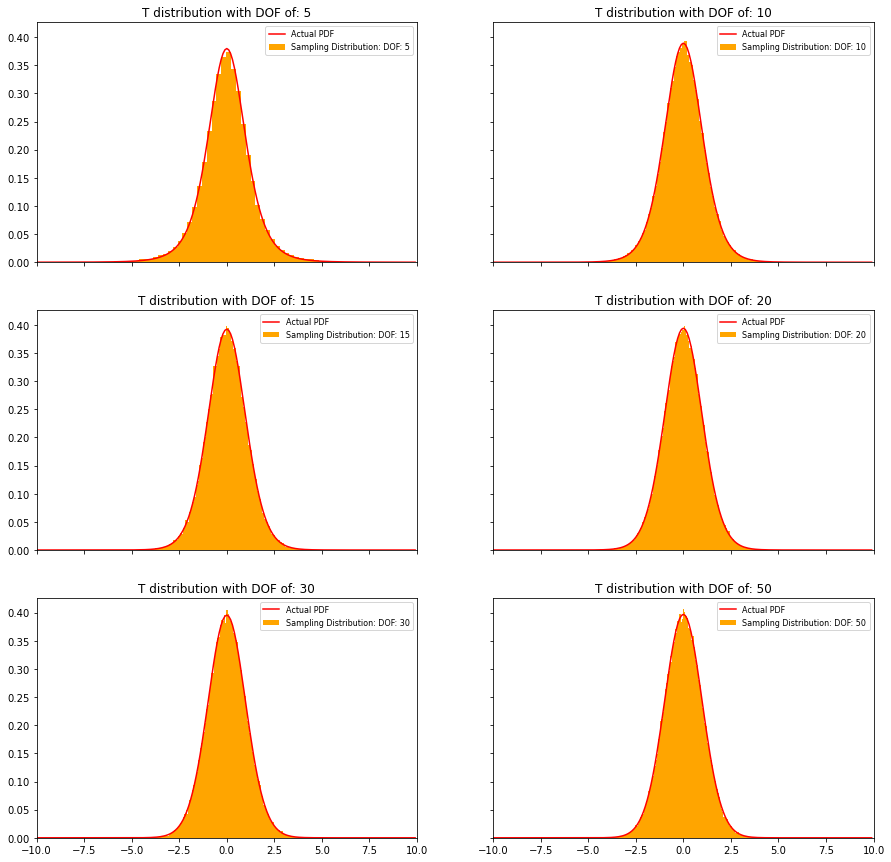

In [29]:
dof = [[5, 10],
       [15, 20], 
       [30, 50]]

N = 100000

normSamp = stats.norm().rvs(N)
fig, axes = pp.subplots(3, 2, sharey=True, sharex=True, figsize=(15, 15))
    
for row in range(len(axes)):
    for col in range(len(axes[row])):
        degree = dof[row][col]
        chi2Samp = stats.chi2(degree - 1).rvs(N)
        combined = []
        for i in range(N):
            combined.append(normSamp[i] / math.sqrt(chi2Samp[i] / (degree - 1)))
        currAx = axes[row][col]
        currAx.hist(combined, bins=150, density=True, color='orange', label=f'Sampling Distribution: DOF: {degree}')
        currAx.set_title(f'T distribution with DOF of: {degree}')
        t = stats.t(degree).pdf
        x = np.arange(-10, 10, .1)
        currAx.plot(x, t(x), color='red', label='Actual PDF')
        currAx.set_xlim(-10, 10)
        currAx.legend(loc='upper right', prop={'size':8})
pp.show()

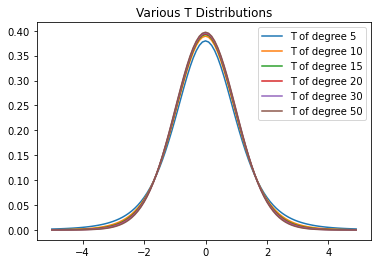

In [3]:
degrees = [5, 10, 15, 20, 30, 50]

xVals = np.arange(-5, 5, .1)

for degree in degrees:
    pp.plot(xVals, stats.t(degree).pdf(xVals), label = f'T of degree {degree}')
pp.legend()
pp.title('Various T Distributions')
pp.show()

Changing the degree slightly tightens the graph. As the degrees get higher, the change becomes less and less.

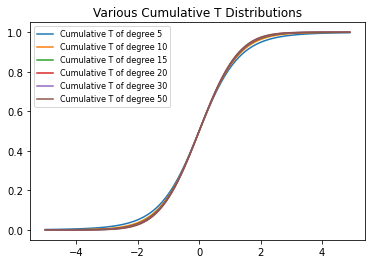

In [4]:
xVals = np.arange(-5, 5, 0.1)

for degree in degrees:
    pp.plot(xVals, stats.t(degree).cdf(xVals), label=f'Cumulative T of degree {degree}')
    
pp.legend(prop={'size' : 8})
pp.title('Various Cumulative T Distributions')
pp.show()

Similarily, changing the degree has little effect once the degree gets high enough. It does slightly steepen the curve, however

## Question 4.

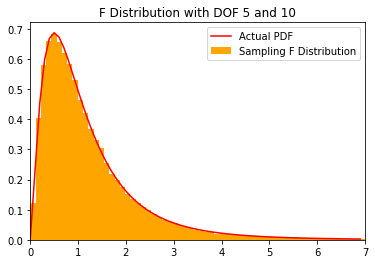

In [12]:
dof = [5, 10]

chi2One = stats.chi2(dof[0]).rvs(N)
chi2Two = stats.chi2(dof[1]).rvs(N)

f = [((chi2One[i] / dof[0]) / (chi2Two[i] / dof[1])) for i in range(N)]

x = np.arange(0, 7, 0.1)

pp.hist(f, bins=250, density=True, label='Sampling F Distribution', color='orange')
pp.xlim(0, 7)
pp.plot(x, stats.f(dof[0], dof[1]).pdf(x), label='Actual PDF', color='red')
pp.legend()
pp.title(f'F Distribution with DOF {dof[0]} and {dof[1]}')
pp.show()

# Question 5

In [13]:
print('The chances of a sample mean being greater than the limit: 0.5')

statistic = (7960 - 7950) / (100 / math.sqrt(25))
norm = stats.norm().pdf
print(f'The likelihood that x > 7960 is: {round(scint.quad(norm, statistic, np.inf)[0], REG_ROUND)}')

The chances of a sample mean being greater than the limit: 0.5
The likelihood that x > 7960 is: 0.3085


# Question 6

In [14]:
xVal1 = stats.chi2(2).ppf(.99)
xVal2 = stats.chi2(6).ppf(1 - .95)
chi2Three = stats.chi2(10).pdf
topBound = scint.quad(chi2Three, 23.209, np.inf)[0]
c = 0.015 + topBound
xVal3 = stats.chi2(10).ppf(1 - c)
print(f'Alpha Value for first one: {round(xVal1, REG_ROUND)}')
print(f'Alpha Value for second one: {round(xVal2, REG_ROUND)}')
print(f'Alpha Value for third one: {round(xVal3, REG_ROUND)}')

Alpha Value for first one: 9.2103
Alpha Value for second one: 1.6354
Alpha Value for third one: 20.4831


## Question 7

In [15]:
popMean = 30
n = 16
sampMean = 27.5
s = 5

upperBound = stats.t(n - 1).ppf(1 - 0.025)
lowerBound = -upperBound
t = (sampMean - popMean) / (s / math.sqrt(n))

print(f'Lower Bound: {round(lowerBound, REG_ROUND)}')
print(f'Upper Bound: {round(upperBound, REG_ROUND)}')
print(f'Computed t-statistic: {round(t, REG_ROUND)}')

Lower Bound: -2.1314
Upper Bound: 2.1314
Computed t-statistic: -2.0


Since the computed t-statistic falls between the lower and upper bounds, it would be appropriate to draw a conclusion that the claim of an average battery life of 30 hours for all batteries still holds true

## Question 8

In [16]:
fStats = [0.95, 0.95, 0.99, 0.05, 0.01]
degrees = [7, 15, 15, 7, 24, 19, 19, 24, 28, 12]

for i in range(len(fStats)):
    deg1 = degrees[2 * i]
    deg2 = degrees[(2 * i) + 1]
    f = stats.f(deg1, deg2)
    fStat = f.ppf(fStats[i])
    print(f'{round(1 - fStats[i], 2)} F statistic for degrees of freedom {deg1} & {deg2} is: {round(fStat, REG_ROUND)}')
    

0.05 F statistic for degrees of freedom 7 & 15 is: 2.7066
0.05 F statistic for degrees of freedom 15 & 7 is: 3.5107
0.01 F statistic for degrees of freedom 24 & 19 is: 2.9249
0.95 F statistic for degrees of freedom 19 & 24 is: 0.473
0.99 F statistic for degrees of freedom 28 & 12 is: 0.3453
